<a href="https://colab.research.google.com/github/Kiko-exe/Environmental-physics/blob/main/Copy_of_2024_Exercise_3_(Week_4)_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving the diffusion equation in 2D using a finite difference method

For this exercise, first look at the textbook example of 2D diffusion in python here: https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/


In particular, read the first part describing the first three equations, and how the state of the system at time step $n+1$ may be calculated from its state at time step $n$.

In this exercise, consider a square puddle with side lengths of 10 cm which is shallow so that this is a 2D problem. Some contamination - an ionic species of diffusion coefficient $D = 2$ x $10^3\mu$m$^2$ s$^{-1}$ - is dropped into the pool. At time $t=0$ s it has a concentration of 1 mol L$^{-1}$ within a circle of radius $r=10$ mm at the centre of the pool.

In the first block of code, we set up the constants, variables and initial conditions for this problem.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# puddle size in m
# width
w = 0.1
#height
h = 0.1

# length of spatial intervals in x-, y- directions in m
dx = dy = 0.001
# number of spatial intervals in each direction
nx, ny = int(w/dx), int(h/dy)

# Diffusion coefficient for the contaminant, m2.s-1
D = 2e-9

# Initial concentration of the contaminant in mol L-1
C_init = 1

# Define an initial matrix in which there is no contamination, and a copy of that matrix
c0 = np.zeros((nx, ny))
c = c0.copy()

# Initial conditions occur within a circle of radius r centred at (cx,cy) (in m)
r, cx, cy = 0.01, 0.05, 0.05
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            c0[i,j] = C_init

# Define shorthand variables for dx*dx and dy*dy
dx2, dy2 = dx*dx, dy*dy

# Define the scaling of dt using the scaling of dx, dy and D; based on the convection-diffusion equation in the infinitessimal limit.
dt = dx2 * dy2 / (2 * D * (dx2 + dy2))

# Number of timesteps for the simulation
nsteps = 101

In a second block of code, a function is defined for calculating the diffusion, using the third equation on the link given above.

In [ ]:

# Do the calculation with forward-difference in time, central-difference in space

# Notes on syntax for vectors here:
# vec[a:b] means the elements from a to b of the vector vec
# vec[:] means all the elements
# vec[a:] means from element a to the final element
# vec[a:-1] means from element a to the end of the vector, except the last element
# So here c[1:-1, 1:-1] means from the second element (the first one has index zero) to the second to last element for both x and y
# We don't include all the elements because those on the edge cannot use the central-difference formulation (there is no element next to them)
# This is equivalent to having a boundary condition of zero concentration along the edge

def do_timestep(c0, c):
    c[1:-1, 1:-1] = c0[1:-1, 1:-1] + D * dt * (
          (c0[2:, 1:-1] - 2*c0[1:-1, 1:-1] + c0[:-2, 1:-1])/dx2
          + (c0[1:-1, 2:] - 2*c0[1:-1, 1:-1] + c0[1:-1, :-2])/dy2 )

    c0 = c.copy()
    return c0, c




In the third block, the calculations are carried out and four plots are produced.

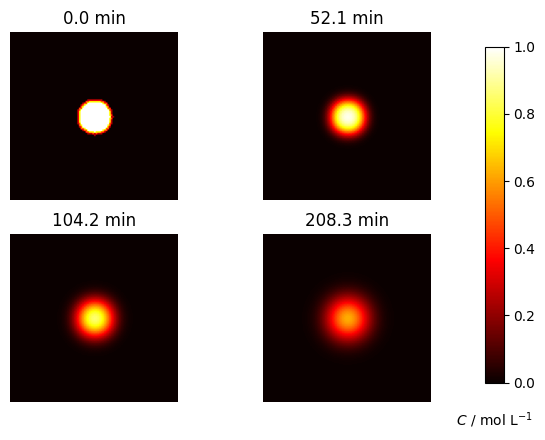

In [ ]:
# Output 4 figures at these timesteps
mfig = [0, 25, 50, 100]

# This variable counts the figures generates
fignum = 0

# This creates a figure
fig = plt.figure()

# This uses the function defined in block 2 to calculate through the timesteps
for m in range(nsteps):
    c0, c = do_timestep(c0, c)

    # This code creates and formats a figure if the step number is one of those specified above
    if m in mfig:
        fignum += 1
        ax = fig.add_subplot(220 + fignum)
        im = ax.imshow(c.copy(), cmap=plt.get_cmap('hot'), vmin=0,vmax=C_init)
        ax.set_axis_off()
        ax.set_title('{:.1f} min'.format(m*dt/60))

# This code formats and shows the subfigures together
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$C$ / mol L$^{-1}$', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
plt.show()


# Exercises to complete

When generating your data, remember to run blocks 1, 2 and 3 in turn or else python may use old variables stored in memory for the calculation.

1.   Complete the code in block 2 where "..." appears.
2.   Perform a calculation for each of the following cases. For each, send a screenshot of your 4 plots and give the final concentration in mol L$^{-1}$ at $\left(x, y\right)=\left(2.5, 2.5\right)$ and $\left(5.0, 5.0\right)$ cm (or a grid point close to these positions).



> *   Use spatial intervals $dx$ and $dy$ of 10, 1, and 0.1 mm (then use 1 mm for subsequent calculations).
*   Put the initial circle at some off-centre position.
*   (Bonus - not compulsory) Use a square of side length 20 mm for the initial area of contamination.









In [ ]:
# Final concentration at specified positions
conc_2_5 = c[int(0.025/dx), int(0.025/dy)]
conc_5_0 = c[int(0.05/dx), int(0.05/dy)]

print("Final concentration at (2.5, 2.5) cm:", conc_2_5, "mol/L")
print("Final concentration at (5.0, 5.0) cm:", conc_5_0, "mol/L")


Final concentration at (2.5, 2.5) cm: 0.00013006767617662 mol/L
Final concentration at (5.0, 5.0) cm: 0.00030535061246147056 mol/L


Final concentration with dx=0.01 m at (2.5, 2.5) cm: 0.0 mol/L
Final concentration with dx=0.01 m at (5.0, 5.0) cm: 0.5 mol/L


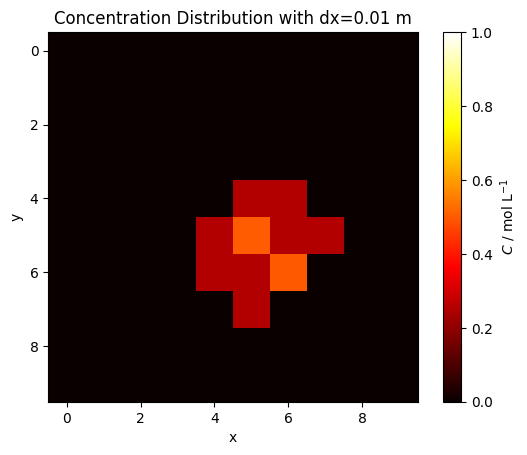

Final concentration with dx=0.001 m at (2.5, 2.5) cm: 0.0 mol/L
Final concentration with dx=0.001 m at (5.0, 5.0) cm: 1.0 mol/L


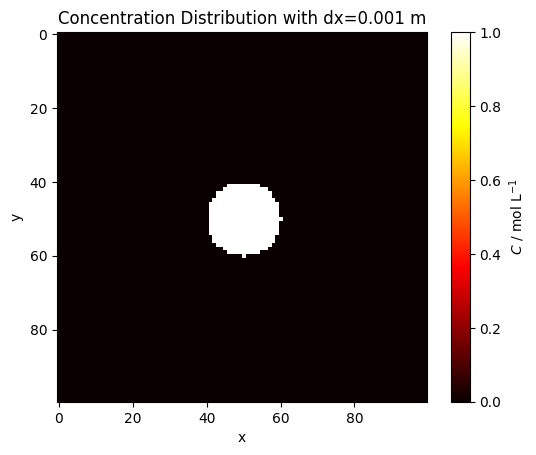

Final concentration with dx=0.0001 m at (2.5, 2.5) cm: 0.0 mol/L
Final concentration with dx=0.0001 m at (5.0, 5.0) cm: 1.0 mol/L


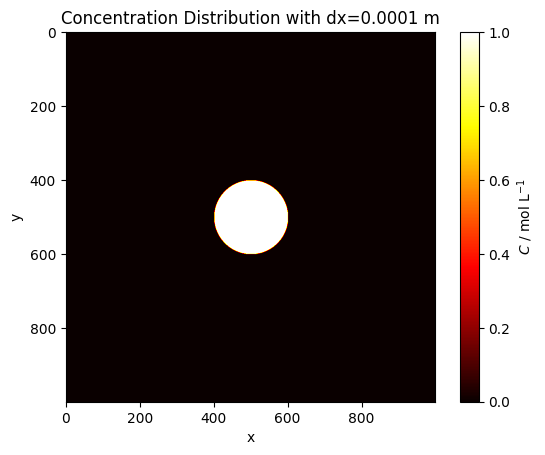

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = 0.1
h = 0.1
D = 2e-9
C_init = 1
r = 0.01
cx = 0.05
cy = 0.05
dx_values = [0.01, 0.001, 0.0001]

def do_timestep(c0, c):
    c[1:-1, 1:-1] = c0[1:-1, 1:-1] + D * dt * (
          (c0[2:, 1:-1] - 2*c0[1:-1, 1:-1] + c0[:-2, 1:-1])/dx2
          + (c0[1:-1, 2:] - 2*c0[1:-1, 1:-1] + c0[1:-1, :-2])/dy2 )

    c0 = c.copy()
    return c0, c


for dx in dx_values:
    dy = dx
    nx, ny = int(w/dx), int(h/dy)
    dt = dx**2 * dy**2 / (2 * D * (dx**2 + dy**2))

    c0 = np.zeros((nx, ny))

    r2 = r**2
    for i in range(nx):
        for j in range(ny):
            p2 = (i*dx-cx)**2 + (j*dy-cy)**2
            if p2 < r2:
                c0[i,j] = C_init

    nsteps = 101
    c = c0.copy()
    c0, c = do_timestep(c0, c)

    conc_2_5 = c[int(0.025/dx), int(0.025/dy)]
    conc_5_0 = c[int(0.05/dx), int(0.05/dy)]

    print(f"Final concentration with dx={dx} m at (2.5, 2.5) cm: {conc_2_5} mol/L")
    print(f"Final concentration with dx={dx} m at (5.0, 5.0) cm: {conc_5_0} mol/L")

    plt.imshow(c, cmap='hot', vmin=0, vmax=C_init)
    plt.colorbar(label='$C$ / mol L$^{-1}$')
    plt.title(f'Concentration Distribution with dx={dx} m')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
